In [1]:
import numpy as np
import torch 
import sys
import matplotlib.pyplot as plt

sys.path.insert(0, 'src/')

from src.model.config import StableDiffusionConfig
from src.model.clip import CLIPEncoder
from src.model.diffusion import StableDiffusion
from src.utils import forward_diffusion, convert_tensor_to_image
from src.model.dataset import get_dataloader
from src.model.tokenizer import Tokenizer
from src.model.dataset import SD_Dataset

from PIL import Image

from torchinfo import summary

from torch.nn.utils.rnn import pad_sequence

from torchvision.transforms.functional import pil_to_tensor, to_pil_image
from torchvision.transforms import Compose, Lambda, Resize, ToPILImage, ToTensor

config = StableDiffusionConfig()

In [2]:
dl = get_dataloader(config)

In [3]:
t = next(enumerate(dl))

In [4]:
t[1][0]

[tensor([49406, 49406]),
 tensor([ 320, 5560]),
 tensor([2533, 1656]),
 tensor([5050, 1977]),
 tensor([320, 320]),
 tensor([2754, 5690]),
 tensor([539, 536]),
 tensor([14559,   320]),
 tensor([15223,  4489]),
 tensor([585, 269]),
 tensor([  593, 49407]),
 tensor([ 9696, 49407]),
 tensor([  269, 49407]),
 tensor([49407, 49407]),
 tensor([49407, 49407]),
 tensor([49407, 49407]),
 tensor([49407, 49407]),
 tensor([49407, 49407]),
 tensor([49407, 49407]),
 tensor([49407, 49407]),
 tensor([49407, 49407]),
 tensor([49407, 49407]),
 tensor([49407, 49407]),
 tensor([49407, 49407]),
 tensor([49407, 49407]),
 tensor([49407, 49407]),
 tensor([49407, 49407]),
 tensor([49407, 49407]),
 tensor([49407, 49407]),
 tensor([49407, 49407])]

In [5]:
ds = SD_Dataset(config)

In [6]:
ds[0][0]

[49406,
 320,
 9706,
 525,
 320,
 2682,
 1253,
 1312,
 556,
 2006,
 531,
 3384,
 49407,
 49407,
 49407,
 49407,
 49407,
 49407,
 49407,
 49407,
 49407,
 49407,
 49407,
 49407,
 49407,
 49407,
 49407,
 49407,
 49407,
 49407]

In [7]:
t[1][0][0]

tensor([49406, 49406])

In [8]:
tokenizer = Tokenizer(config)

In [9]:
ds = SD_Dataset(config)

In [10]:
img = ds[0][1]

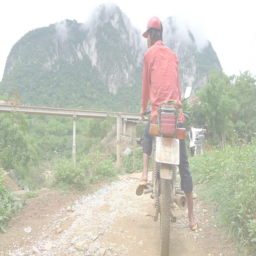

In [11]:
convert_tensor_to_image(img)

In [12]:
caption = ds[0][0]
caption

[49406,
 320,
 9706,
 525,
 320,
 2682,
 1253,
 1312,
 556,
 2006,
 531,
 3384,
 49407,
 49407,
 49407,
 49407,
 49407,
 49407,
 49407,
 49407,
 49407,
 49407,
 49407,
 49407,
 49407,
 49407,
 49407,
 49407,
 49407,
 49407]

Stable Diffusion

In [13]:
img = Image.open('data/images/train2017/000000193271.jpg')

In [14]:
trans = Compose([Resize((256, 256)), ToTensor(), Lambda(lambda t: (t * 2) - 1)])

In [15]:
img_tensor = trans(img)

In [16]:
img_t1 = forward_diffusion(config, img_tensor.to(config.device), torch.tensor([600], device=config.device))

In [17]:
def show_tensor_image(image):
    
    reverse_transforms = Compose([
        Lambda(lambda t: (t + 1) / 2),
        Lambda(lambda t: t.permute(1, 2, 0)), # CHW to HWC
        Lambda(lambda t: t * 255.),
        Lambda(lambda t: t.cpu().numpy().astype(np.uint8)),
        ToPILImage(),
    ])

    if len(image.shape) == 4:
        image = image[0, :, :, :]
    plt.imshow(reverse_transforms(image))

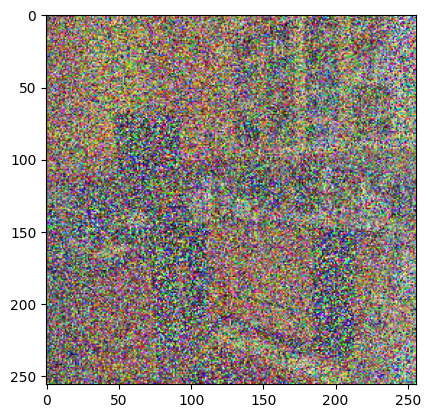

In [18]:
show_tensor_image(img_t1[0])

In [19]:
img = torch.randn((2, config.img_channels, config.img_size, config.img_size)).to('cuda')
tokens = torch.randint(low=0, high=config.vocab_size, size=(2, config.clip_seq_len)).to('cuda')
time = torch.randn((2, config.unet_time_emb_dim//2)).to('cuda')

In [20]:
model = StableDiffusion(config)

In [21]:
model(img, tokens, time).to('cuda')

torch.Size([2, 30, 768]) torch.Size([30, 768])
torch.Size([2, 1, 320])
Layer number  0
x-shape torch.Size([2, 1280, 4, 4])
Layer number  1
x-shape torch.Size([2, 1280, 4, 4])
Layer number  2
x-shape torch.Size([2, 1280, 8, 8])
Layer number  3
x-shape torch.Size([2, 1280, 8, 8])
Layer number  4
x-shape torch.Size([2, 1280, 8, 8])
Layer number  5
x-shape torch.Size([2, 1280, 16, 16])
Layer number  6
x-shape torch.Size([2, 640, 16, 16])
Layer number  7
x-shape torch.Size([2, 640, 16, 16])
Layer number  8
x-shape torch.Size([2, 640, 32, 32])
Layer number  9
x-shape torch.Size([2, 320, 32, 32])
Layer number  10
x-shape torch.Size([2, 320, 32, 32])
Layer number  11
x-shape torch.Size([2, 320, 32, 32])


tensor([[[[-0.0131, -0.0425, -0.0251,  ..., -0.0124, -0.0115, -0.0446],
          [-0.0025, -0.0535, -0.0789,  ..., -0.0327, -0.0403, -0.0514],
          [-0.0054, -0.0703, -0.0625,  ..., -0.0033, -0.0444, -0.0470],
          ...,
          [-0.0190, -0.0486, -0.0424,  ..., -0.0583, -0.0945, -0.0566],
          [-0.0325, -0.0742, -0.0507,  ..., -0.0384, -0.1091, -0.0586],
          [ 0.0059, -0.0267, -0.0032,  ..., -0.0113, -0.0582, -0.0308]],

         [[ 0.0141, -0.0131, -0.0033,  ..., -0.0379, -0.0255, -0.0310],
          [-0.0087, -0.0102, -0.0304,  ..., -0.0550, -0.0360, -0.0222],
          [-0.0246, -0.0306, -0.0763,  ..., -0.0584, -0.0395, -0.0348],
          ...,
          [-0.0156, -0.0319, -0.0489,  ..., -0.0726, -0.0308, -0.0248],
          [ 0.0025, -0.0259, -0.0706,  ..., -0.0499, -0.0478, -0.0321],
          [ 0.0524,  0.0527,  0.0470,  ...,  0.0415,  0.0322, -0.0005]],

         [[ 0.0321,  0.0567,  0.0853,  ...,  0.0747,  0.0705,  0.0936],
          [-0.0360,  0.0682,  

In [22]:
summary(model, [img_size, (1, config.clip_seq_len)])

NameError: name 'img_size' is not defined

VAE

In [ ]:
enc = VAE_Encoder(config.img_channels, config.vae_features_dims, config.vae_num_groups, config.vae_num_heads, config.vae_dropout, config.vae_latent_dim)

print(sum(p.numel() for p in enc.parameters()))

23237584


UNET

In [ ]:
model = UNet(config.vae_latent_dim, config.unet_features_dims, config.unet_attn_num_heads, config.unet_attn_dim, config.unet_time_emb_dim, config.unet_time_emb_dim_scale_factor)

In [ ]:
sum(p.numel() for p in model.parameters())

852620804

In [ ]:
[img.shape, noise.shape]

[torch.Size([1, 3, 512, 512]), torch.Size([1, 4, 64, 64])]

In [ ]:
summary(enc, [(1, 3, 512, 512), (1, 4, 64, 64)])

Layer (type:depth-idx)                             Output Shape              Param #
VAE_Encoder                                        [1, 4, 64, 64]            --
├─Conv2d: 1-1                                      [1, 128, 512, 512]        3,456
├─ModuleList: 1-2                                  --                        --
│    └─VAE_Block: 2-1                              [1, 128, 256, 256]        --
│    │    └─PrenormResidualConnection: 3-1         [1, 128, 512, 512]        147,712
│    │    └─PrenormResidualConnection: 3-2         [1, 128, 512, 512]        147,712
│    │    └─Conv2d: 3-3                            [1, 128, 256, 256]        147,456
│    └─VAE_Block: 2-2                              [1, 256, 128, 128]        --
│    │    └─PrenormResidualConnection: 3-4         [1, 256, 256, 256]        328,192
│    │    └─PrenormResidualConnection: 3-5         [1, 256, 256, 256]        590,336
│    │    └─Conv2d: 3-6                            [1, 256, 128, 128]        589,824
│ 

In [ ]:
summary()

In [ ]:
time = torch.randn((1, config.unet_time_emb_dim))
model(out, time)

TypeError: SwitchSequential.forward() missing 1 required positional argument: 'time'

In [ ]:

tokens.shape

torch.Size([1, 77])

In [ ]:
clip = CLIPEncoder(config.vocab_size, config.clip_emb_dim, config.clip_seq_len,
                   config.clip_attn_num_heads, config.clip_emb_dim_scale_factor, 
                   config.clip_num_layers, config.clip_dropout).to('cuda')

In [ ]:
sum(p.numel() for p in clip.parameters())

123060480

In [ ]:
import torch

torch.save({
    'epoch' : 1
}, "src/model/weights/stable_diffusion_7.pth")

In [ ]:
UNet_AttentionBlock

In [ ]:
text_emb = clip(tokens)

In [ ]:
text_emb.shape

torch.Size([1, 77, 768])

In [ ]:
from torch import nn

In [ ]:
out.shape

torch.Size([1, 4, 64, 64])

In [ ]:
dec = VAE_Decoder(config.vae_latent_dim, config.vae_features_dims, config.vae_num_groups, config.vae_dropout, config.vae_num_heads, config.img_channels)

In [ ]:
print(sum(p.numel() for p in dec.parameters()))

32367379


In [ ]:
dec = dec.to('cuda')

In [ ]:
dec(out).shape

torch.Size([1, 4, 64, 64])
torch.Size([1, 512, 64, 64])
torch.Size([1, 512, 64, 64])
torch.Size([1, 512, 128, 128])
torch.Size([1, 256, 256, 256])
torch.Size([1, 128, 512, 512])


torch.Size([1, 3, 512, 512])